## Experiment Details
After subsetting the data for 8 years, I splited the data in Train(7 years) and Test(1 year) and then apply the following methods.I saved the forecast from each model in 'pred_df'. I saved the MAPE and RMSE from each method in model_performance dataframe and plot it at the end
1. Simple Average
2. Naive Forecast
3. Simple Moving Average
4. Single Exponential Smoothing - This gave the best results
5. Double Exponential Smoothing  - Data is stationary and DES method didnt give any forecast, also it quite visible that there is no trend 
6. Triple Exponential Smoothing - No trend and no seasonality so this model is not applicable
7. Check of Autoregresion, plot acf and pacf  - ACF plot shows that data is stationary, pacf shows lag1 
8. AutoArima - gave the best model as (0,1,0)
10. Perofmed the Dickeyfuller test (data came out to be stationary)
11. Performed 1 order differncing and repeated the Dickey fuller test( data is stationary)
12. plotted the model performance and concluded that Sinlge Exponential smoothing gave the best results

	- MAPE	RMSE
- SimpleAvg	23.723288	25.794159

- Naive	7.834540	9.689191

- mavg_7	1.823632	2.433143

- ewm	1.384628	1.837947

- Auto_Arima	5.172029	7.120838
	


Single Exponential Smoothing gave the best results


### Granger's causuality 

#### Experiment objective - To find out if volume of shares traded  cause the variation in stock price
- took the closing price of stock
- I took the volume the same period
- normalize the data
- did the Granger's test
- found out that volume dont show any causality on stock price


In [419]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance
from scipy import stats
from statsmodels.stats import weightstats as stests
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
import os
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [420]:
os.chdir(r'C:\Users\shree\Desktop\Python\T2 ET MSE')

In [421]:
df = pd.read_csv("data.csv",index_col ='Date',parse_dates = True)

In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3421 entries, 2007-05-10 to 2021-08-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3407 non-null   float64
 1   High       3407 non-null   float64
 2   Low        3407 non-null   float64
 3   Close      3407 non-null   float64
 4   Adj Close  3407 non-null   float64
 5   Volume     3407 non-null   float64
dtypes: float64(6)
memory usage: 187.1 KB


In [423]:
t_df = df[['Close']]

In [424]:
t_df = t_df.loc['2007-10-05':'2015-10-05']

In [425]:
t_df.head()

,Close
Date,
2007-10-10,77.175018
2007-11-10,85.800018
2007-12-10,85.237518
2007-10-15,86.362518
2007-10-16,95.175026


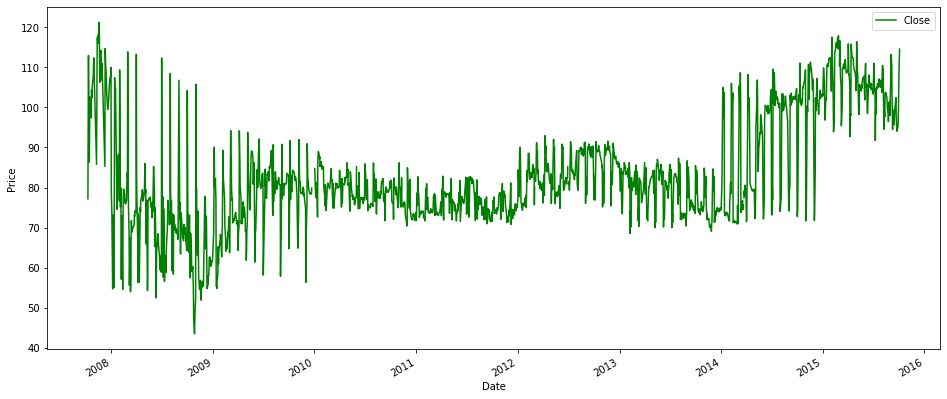

In [426]:
#plotting the closing price with Date
t_df.plot(figsize=(16,7),linestyle='-',color='g')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

<Figure size 1152x432 with 0 Axes>

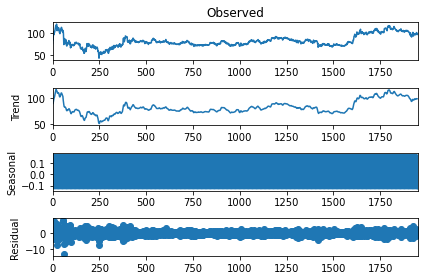

In [550]:
#from statsmodels.tsa.seasonal import seasonal_decompose

ts_decompose = seasonal_decompose(np.array(t_df['Close'].dropna()),
                                 model='additive',
                                 period = 7)

#plotting the decomposed time series components

ts_plot = ts_decompose.plot()

### There is no visible trend, and sesonality in the data

In [427]:
#Creating train and test set 
train = t_df.loc['2007-10-05':'2014-10-05']  #Creating a training dataset for learning for 7 years
test = t_df.loc['2014-10-05':'2015-10-05'] #One year data for forecasting

In [428]:
test.shape

(250, 1)

In [429]:
sdate = '2014-10-05'
edate = '2015-10-05'


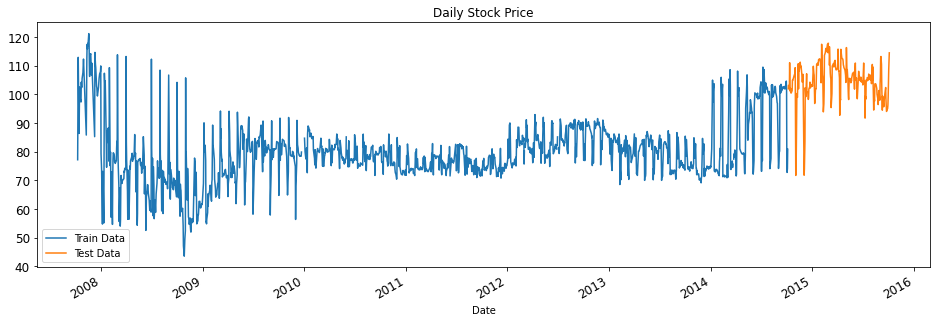

In [430]:
#Plotting data
train.Close.plot(figsize=(16,5), label = 'Train Data',title= 'Daily Stock Price', fontsize=12)
test.Close.plot(figsize=(16,5), label = 'Test Data',title= 'Daily Stock Price', fontsize=12)
plt.legend()
plt.show()

In [431]:
def get_mape(actual,predicted):
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round(np.mean(np.abs((actual-predicted)/actual))*100,2)

In [432]:
pred_df = test.copy()

In [433]:
# Method 1
# Simple Average Method
t_df['SimpleAvg'] = np.mean(train.Close)

pred_df['SimpleAvg'] = t_df['SimpleAvg'][sdate:edate]

In [434]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2014-11-02 to 2015-09-12
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      249 non-null    float64
 1   SimpleAvg  250 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [435]:
pred_df.dropna(inplace=True)

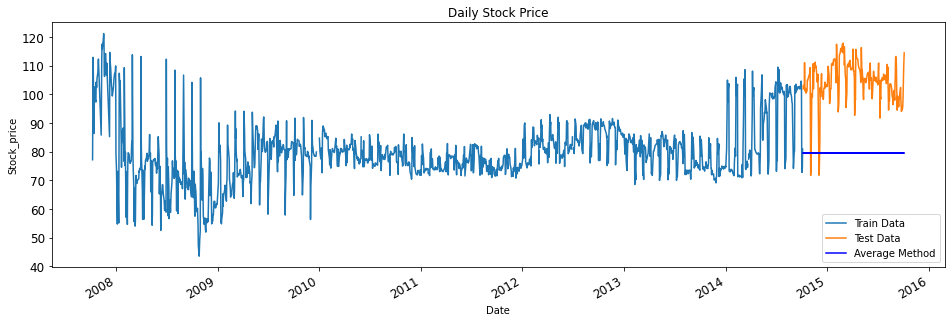

In [436]:
#plotting the test train and predicted data

train.Close.plot(figsize=(16,5), label = 'Train Data',title= 'Daily Stock Price', fontsize=12)
test.Close.plot(figsize=(16,5), label = 'Test Data',title= 'Daily Stock Price', fontsize=12)
plt.plot(pred_df['SimpleAvg'],label='Average Method',linestyle='-',color='b')
plt.xlabel('Date')
plt.ylabel('Stock_price')
plt.legend()
plt.show()

In [437]:
print("MAPE of Simple Average",get_mape(test.Close,pred_df['SimpleAvg']))
print("RMSE of Simple Average",np.sqrt(mean_squared_error(pred_df['Close'],pred_df['SimpleAvg'])))


MAPE of Simple Average 23.91
RMSE of Simple Average 26.092531974042277


In [438]:
#Method 2
#Naive Forecast Method

pred_df['Naive'] = t_df.Close.iloc[-1]



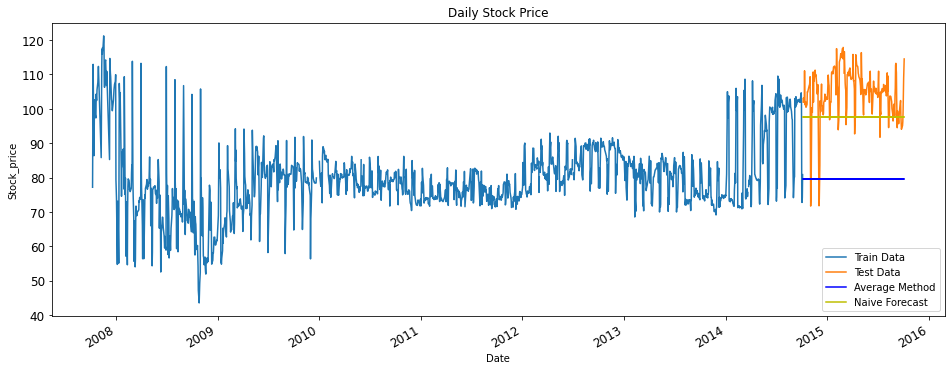

In [439]:
#plotting the test train and predicted data
plt.figure(figsize=(16,6))
train.Close.plot( label = 'Train Data',title= 'Daily Stock Price', fontsize=12)
test.Close.plot(label = 'Test Data',title= 'Daily Stock Price', fontsize=12)
plt.plot(pred_df['SimpleAvg'],label='Average Method',linestyle='-',color='b')
plt.plot(pred_df['Naive'],label = 'Naive Forecast',linestyle='-',color='y')

plt.xlabel('Date')
plt.ylabel('Stock_price')
plt.legend()
plt.show()


In [440]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2014-11-02 to 2015-09-12
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      249 non-null    float64
 1   SimpleAvg  249 non-null    float64
 2   Naive      249 non-null    float64
dtypes: float64(3)
memory usage: 15.9 KB


In [441]:
print("MAPE of Naive Method",get_mape(pred_df['Close'],pred_df['Naive']))
print("RMSE of Naive Method",np.sqrt(mean_squared_error(pred_df['Close'],pred_df['Naive'])))


MAPE of Naive Method 8.02
RMSE of Naive Method 9.966018665629907


In [442]:
#Method 3
#Simple Moving Average
#funtion rolling
t_df['mavg_7'] = t_df['Close'].rolling(window=7).mean().shift(1)
#mavg_7 = t_df.mavg_7[sdate:edate].sort_index()
pred_df['mavg_7']=t_df['mavg_7'][sdate:]
pred_df= pred_df.sort_index()

In [443]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2014-10-06 to 2015-10-04
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      249 non-null    float64
 1   SimpleAvg  249 non-null    float64
 2   Naive      249 non-null    float64
 3   mavg_7     242 non-null    float64
dtypes: float64(4)
memory usage: 9.7 KB


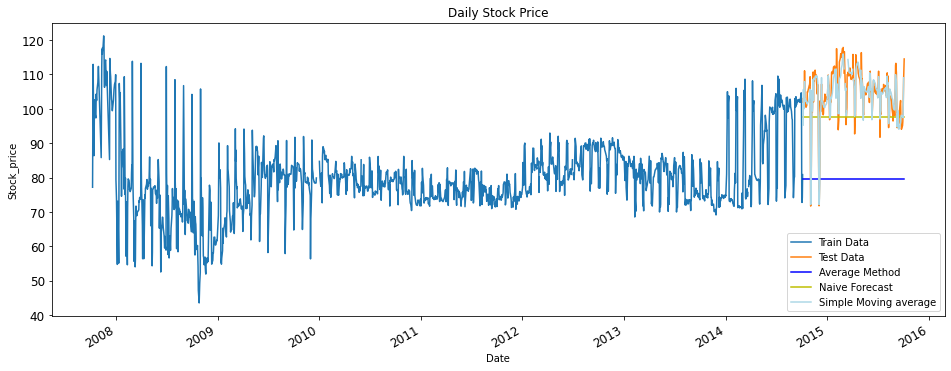

In [444]:

#plotting the test train and predicted data
plt.figure(figsize=(16,6))
train.Close.plot( label = 'Train Data',title= 'Daily Stock Price', fontsize=12)
test.Close.plot(label = 'Test Data',title= 'Daily Stock Price', fontsize=12)
plt.plot(pred_df['SimpleAvg'],label='Average Method',linestyle='-',color='b')
plt.plot(pred_df['Naive'],label = 'Naive Forecast',linestyle='-',color='y')
plt.plot(pred_df['mavg_7'],label = 'Simple Moving average',linestyle='-',color='lightblue')

plt.xlabel('Date')
plt.ylabel('Stock_price')
plt.legend()
plt.show()

In [445]:
pred_df.dropna(inplace=True)

In [446]:
print("MAPE of SMA Method",get_mape(pred_df['Close'],pred_df['mavg_7']))
print("RMSE of SMA Method",np.sqrt(mean_squared_error(pred_df['Close'],pred_df['mavg_7'])))


MAPE of SMA Method 1.82
RMSE of SMA Method 2.43314316452101


In [447]:
#method 4
#Single Exponential smoothing
t_df['ewm'] = t_df['Close'].ewm(alpha = 0.2).mean()
pred_df['ewm'] = t_df['ewm'][sdate:].sort_index()

pred_df= pred_df.sort_index()

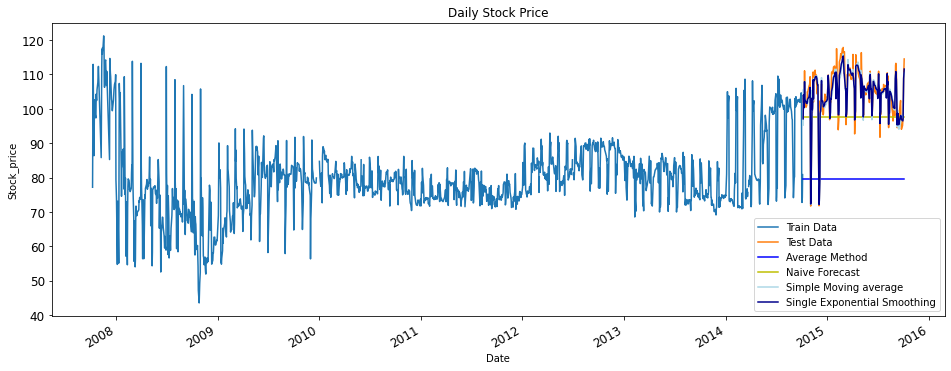

In [448]:
#plotting the test train and predicted data
plt.figure(figsize=(16,6))
train.Close.plot( label = 'Train Data',title= 'Daily Stock Price', fontsize=12)
test.Close.plot(label = 'Test Data',title= 'Daily Stock Price', fontsize=12)
plt.plot(pred_df['SimpleAvg'],label='Average Method',linestyle='-',color='b')
plt.plot(pred_df['Naive'],label = 'Naive Forecast',linestyle='-',color='y')
plt.plot(pred_df['mavg_7'],label = 'Simple Moving average',linestyle='-',color='lightblue')
plt.plot(pred_df['ewm'],label = 'Single Exponential Smoothing',linestyle='-',color='darkblue')


plt.xlabel('Date')
plt.ylabel('Stock_price')
plt.legend()
plt.show()



In [449]:
print("MAPE of Single Exponential smoothing Method",get_mape(pred_df['Close'],pred_df['ewm']))
print("RMSE of Single Exponential smoothing",np.sqrt(mean_squared_error(pred_df['Close'],pred_df['ewm'])))


MAPE of Single Exponential smoothing Method 1.38
RMSE of Single Exponential smoothing 1.837946919887143


In [457]:
train.dropna(inplace=True)

In [460]:
#method 5
#Double Exponential smoothing
model = ExponentialSmoothing(train.Close,trend='add')

fitdes = model.fit(optimized=True)

pred_df['des']  = fitdes.forecast(len(pred_df))
#pred_df['des'] = df['des'].iloc[20:]

In [461]:
fitdes.summary() #No trend in data so we will not use this model

Dep. Variable:,Close,No. Observations:,1702
Model:,ExponentialSmoothing,SSE,4824.564
Optimized:,True,AIC,1781.341
Trend:,Additive,BIC,1803.100
Seasonal:,None,AICC,1781.391
Seasonal Periods:,None,Date:,"Mon, 16 Aug 2021"
Box-Cox:,False,Time:,17:51:57
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,6.4084e-14,beta,True


## data looks sationary and using Double and triple exponential will not give any forecast

In [463]:
#method 6
#Triple Exponential smoothing
model = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=7)

fittes = model.fit(optimized=True)

pred_df['tes'] = fitdes.forecast(len(pred_df))
#pred_df['tes'] = df['tes'].iloc[20:]

In [464]:
fittes.summary() # as per the output there is no rend and seaonality

Dep. Variable:,Close,No. Observations:,1702
Model:,ExponentialSmoothing,SSE,4793.639
Optimized:,True,AIC,1784.397
Trend:,Additive,BIC,1844.232
Seasonal:,Additive,AICC,1784.612
Seasonal Periods:,7,Date:,"Mon, 16 Aug 2021"
Box-Cox:,False,Time:,17:52:24
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,2.6326e-09,beta,True


In [465]:
#Auto correlation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

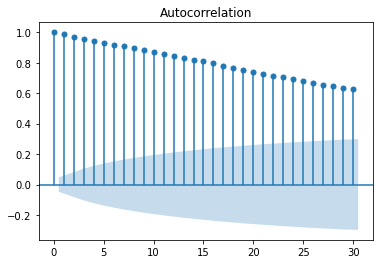

In [466]:
acf_plot = plot_acf(train.Close,lags = 30)

### our data looks stationary, we will confirm it later with Dickey fuller test

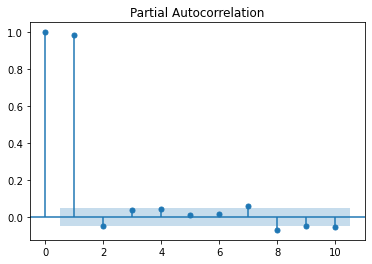

In [553]:
pacf_plot = plot_pacf(train.Close,lags=10)

In [468]:
from statsmodels.tsa.arima_model import ARIMA

In [469]:
#Auto Arima
from pmdarima import auto_arima
model1 = auto_arima(train,
                    start_p=0,start_q=0,
                    max_p=3,max_q=3,m=12,
                    trace=True,seasonal=False,
                    information_criterion='aic'
                    ,stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6604.528, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6603.537, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6603.203, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6602.648, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6604.057, Time=0.32 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.676 seconds


In [470]:
model_best = ARIMA(train,order=(0,1,0))

In [471]:
model_best = model_best.fit()

In [472]:
model_best.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARIMA
===================================================================
Model:              ARIMA            BIC:                 6615.4061
Dependent Variable: D.Close          Log-Likelihood:      -3300.3  
Date:               2021-08-16 17:53 Scale:               1.0000   
No. Observations:   1701             Method:              css      
Df Model:           1                Sample:              1        
Df Residuals:       1700                                  2        
Converged:          1.0000           S.D. of innovations: 1.684    
No. Iterations:     0.0000           HQIC:                6608.555 
AIC:                6604.5282                                      
----------------------------------------------------------------------
           Coef.     Std.Err.      t       P>|t|      [0.025    0.975]
----------------------------------------------------------------------
const      0.0141      0.0408    0.3461    0.7293    -0.0659    0.0942
===================================================================

"""

In [473]:
pred_df['Auto_Arima'] = model_best.forecast(len(pred_df))[0]

In [474]:
pred_df

,Close,SimpleAvg,Naive,mavg_7,ewm,des,tes,Auto_Arima
Date,,,,,,,,
2014-10-06,101.962524,79.579161,97.612526,95.255382,97.088384,NaN,NaN,101.226655
2014-10-07,103.162521,79.579161,97.612526,105.642882,104.047812,NaN,NaN,101.240787
2014-10-09,102.112526,79.579161,97.612526,100.007167,100.375175,NaN,NaN,101.254918
2014-10-10,102.037521,79.579161,97.612526,102.958953,102.676855,NaN,NaN,101.269050
2014-10-11,111.075027,79.579161,97.612526,107.946455,107.916651,NaN,NaN,101.283181
...,...,...,...,...,...,...,...,...
2015-09-28,95.100021,79.579161,97.612526,97.896453,96.542728,NaN,NaN,104.575796
2015-09-29,96.262527,79.579161,97.612526,97.730380,96.486688,NaN,NaN,104.589928
2015-09-30,99.262527,79.579161,97.612526,97.435737,97.041856,NaN,NaN,104.604059


** Stationarity Test **

** DickeyFuller Test **

In [475]:
from statsmodels.tsa.stattools import adfuller

In [540]:
#dickey fuller test
df_test = adfuller(train['Close'].values)

In [541]:
df_test

(-3.5789997599154137,
 0.006175434450273402,
 18,
 1683,
 {'1%': -3.4342414449790506,
  '5%': -2.863258853167956,
  '10%': -2.5676850737037284},
 6304.078010602903)

As p-value is less than .05 hence we can reject the  Null hyopthesis which states that data has unit root and not stationary
Our Data is seems to be sationary

Auto arima gives 1 order diffeerncing - lets try that, it may make series more stationary

In [542]:
data_1_diff = train['Close'].diff()
df_test_1d = adfuller(data_1_diff[1:])

In [543]:
df_test_1d

(-10.459567299268675,
 1.3702506166526887e-18,
 17,
 1683,
 {'1%': -3.4342414449790506,
  '5%': -2.863258853167956,
  '10%': -2.5676850737037284},
 6311.969231986116)

After one order differencing , test gives strong evidence  that data stationary, we can apply ARIMA model with 1 order differncing

** Calculating MAPE and RMSE for each method/model **

In [487]:
pred_df.columns

Index(['Close', 'SimpleAvg', 'Naive', 'mavg_7', 'ewm', 'des', 'tes',
       'Auto_Arima'],
      dtype='object')

In [491]:
c = ['SimpleAvg', 'Naive', 'mavg_7', 'ewm', 'Auto_Arima']

mapeALL =[]
for i in c:
    actual = pred_df['Close']
    pred = pred_df[i]
    mapeALL.append(np.mean(np.abs( (actual-pred)/actual ))*100)

In [493]:
c = ['SimpleAvg', 'Naive', 'mavg_7', 'ewm', 'Auto_Arima']


rmseALL =[]
for i in c:
    actual = pred_df['Close']
    pred = pred_df[i]
    rmseALL.append(np.sqrt(mean_squared_error(actual,pred)))

In [497]:
model_performance = pd.DataFrame(data={'MAPE':mapeALL,'RMSE':rmseALL},index=c)

<AxesSubplot:>

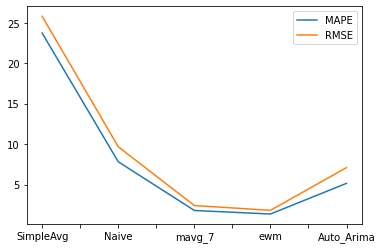

In [499]:
model_performance.plot()

In [500]:
model_performance

,MAPE,RMSE
SimpleAvg,23.723288,25.794159
Naive,7.834540,9.689191
mavg_7,1.823632,2.433143
ewm,1.384628,1.837947
Auto_Arima,5.172029,7.120838


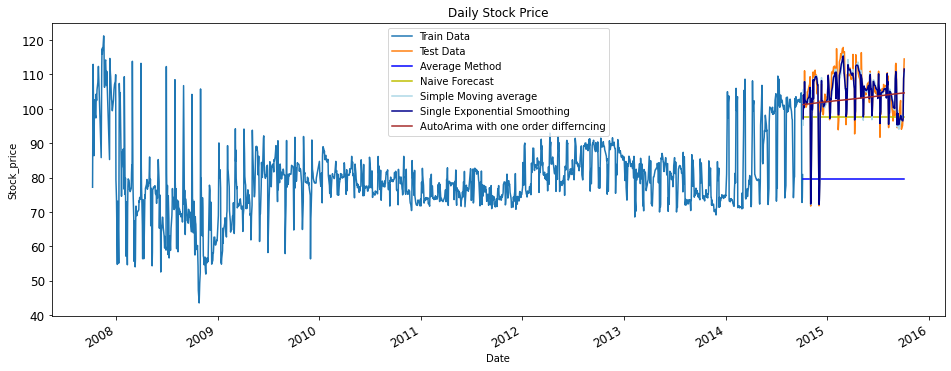

In [503]:
#plotting the test train and predicted data
plt.figure(figsize=(16,6))
train.Close.plot( label = 'Train Data',title= 'Daily Stock Price', fontsize=12)
test.Close.plot(label = 'Test Data',title= 'Daily Stock Price', fontsize=12)
plt.plot(pred_df['SimpleAvg'],label='Average Method',linestyle='-',color='b')
plt.plot(pred_df['Naive'],label = 'Naive Forecast',linestyle='-',color='y')
plt.plot(pred_df['mavg_7'],label = 'Simple Moving average',linestyle='-',color='lightblue')
plt.plot(pred_df['ewm'],label = 'Single Exponential Smoothing',linestyle='-',color='darkblue')
plt.plot(pred_df['Auto_Arima'],label = 'AutoArima with one order differncing',linestyle='-',color='brown')


plt.xlabel('Date')
plt.ylabel('Stock_price')
plt.legend()
plt.show()

## Single Exponential Smoothing gave the best results

### Grangercausality

In [504]:
from statsmodels.tsa.stattools import grangercausalitytests

In [510]:
g_df = pd.read_csv("data.csv")

In [519]:
g_df.dropna(inplace=True)

In [520]:
g_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-10-2007,67.350014,82.125023,62.362514,75.450020,53.297131,641411742.0
1,08-10-2007,78.000015,78.000015,71.137520,71.587517,50.568695,95003786.0
2,09-10-2007,71.625015,77.137520,67.762512,76.462517,54.012344,87544282.0
3,10-10-2007,78.450020,78.750015,76.500015,77.175018,54.515648,50948533.0
4,11-10-2007,90.000023,90.000023,76.500015,85.800018,60.608242,79740716.0


In [521]:
df_gr = pd.DataFrame({'Date':g_df['Date'],'Close':g_df['Close'],'Volume':g_df['Volume']})

In [522]:
df_gr

,Date,Close,Volume
0,05-10-2007,75.450020,641411742.0
1,08-10-2007,71.587517,95003786.0
2,09-10-2007,76.462517,87544282.0
3,10-10-2007,77.175018,50948533.0
4,11-10-2007,85.800018,79740716.0
...,...,...,...
3416,09-08-2021,176.449997,12311254.0
3417,10-08-2021,172.600006,8943948.0
3418,11-08-2021,176.350006,23459974.0
3419,12-08-2021,187.000000,43580817.0


In [523]:
def normalize(df):
    x = df.copy()
    for i in x.columns[1:]:
        x[i] = x[i]/x[i][0]
    return x

In [524]:
df_gr = normalize(df_gr)

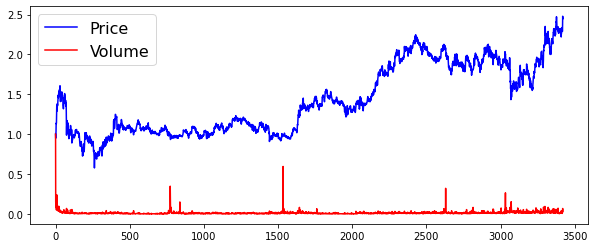

In [525]:
plt.figure(figsize=(10,4))
plt.plot(df_gr.Close, color='b')
plt.plot(df_gr.Volume, color='r')

plt.legend(['Price', 'Volume'], fontsize=16);

In [529]:
gc_res = grangercausalitytests(df_gr[['Close','Volume']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2918  , p=0.5891  , df_denom=3403, df_num=1
ssr based chi2 test:   chi2=0.2920  , p=0.5889  , df=1
likelihood ratio test: chi2=0.2920  , p=0.5889  , df=1
parameter F test:         F=0.2918  , p=0.5891  , df_denom=3403, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1251  , p=0.1196  , df_denom=3400, df_num=2
ssr based chi2 test:   chi2=4.2564  , p=0.1191  , df=2
likelihood ratio test: chi2=4.2537  , p=0.1192  , df=2
parameter F test:         F=2.1251  , p=0.1196  , df_denom=3400, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6681  , p=0.5716  , df_denom=3397, df_num=3
ssr based chi2 test:   chi2=2.0085  , p=0.5706  , df=3
likelihood ratio test: chi2=2.0080  , p=0.5708  , df=3
parameter F test:         F=0.6681  , p=0.5716  , df_denom=3397, df_num=3


As all the p values are greater than .05 we can say there is no causality between stock closing price and volume traded